# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
df = pd.read_excel('creditdata.xls')

In [2]:
print ('dataframe shape:', df.shape)
# The CRX.names file does verify the dataframe should have 690 instances
# and 15 attributes (features) and 1 class attribute for a total of 15

dataframe shape: (690, 16)


In [3]:
nanmap = {'?':np.nan}
df = df.replace(nanmap)
print ('These are the NaN vals per column:')
print ('\n')
print (df.isna().sum())
# These NaN counts do match the massing val counts from the crx.names

These are the NaN vals per column:


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [4]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [5]:
df['A11'] = df['A11'].astype(float) 
df['A15'] = df['A15'].astype(float) 
df.dtypes
# Now everything matches the crx.names file 

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [6]:
approved_df = df[df['A16'] == '+']
denied_df = df[df['A16'] == '-']

In [7]:
approved_df.head(15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,120.0,0.0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,360.0,0.0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,164.0,31285.0,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,80.0,1349.0,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,180.0,314.0,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,52.0,1442.0,+


In [8]:
denied_df.head(15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-
75,b,20.67,5.290,u,g,q,v,0.375,t,t,1.0,f,g,160.0,0.0,-
76,b,34.08,6.500,u,g,aa,v,0.125,t,f,0.0,t,g,443.0,0.0,-
77,a,19.17,0.585,y,p,aa,v,0.585,t,f,0.0,t,g,160.0,0.0,-
78,b,21.67,1.165,y,p,k,v,2.500,t,t,1.0,f,g,180.0,20.0,-
79,b,21.50,9.750,u,g,c,v,0.250,t,f,0.0,f,g,140.0,0.0,-


In [9]:
# Quick descriptive stat summary of the two dfs

print ('The Approved DF:')
print ('\n')
print (approved_df.describe())
print ('\n')
print ('The Denied DF:')
print ('\n')
print (denied_df.describe())

# Quickly glancing at the descriptive stats, I notice the means 
# for every feature but A14 are higher for the Approved DF

The Approved DF:


               A2          A3          A8         A11         A14  \
count  305.000000  307.000000  307.000000  307.000000  301.000000   
mean    33.720492    5.904951    3.427899    4.605863  164.421927   
std     12.809641    5.471485    4.120792    6.320242  161.770675   
min     13.750000    0.000000    0.000000    0.000000    0.000000   
25%     23.170000    1.500000    0.750000    0.000000    0.000000   
50%     30.500000    4.460000    2.000000    3.000000  120.000000   
75%     41.330000    9.520000    5.000000    7.000000  280.000000   
max     76.750000   28.000000   28.500000   67.000000  840.000000   

                 A15  
count     307.000000  
mean     2038.859935  
std      7659.763941  
min         0.000000  
25%         0.000000  
50%       221.000000  
75%      1209.000000  
max    100000.000000  


The Denied DF:


               A2          A3          A8         A11          A14  \
count  373.000000  383.000000  383.000000  383.000000   376.000

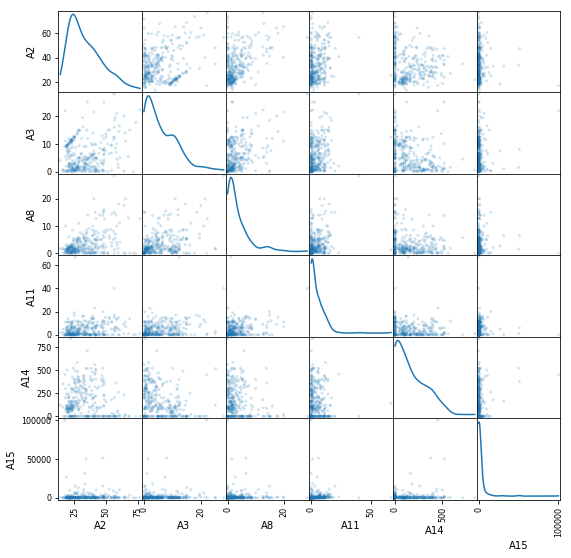

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(approved_df, alpha = 0.2, figsize=(9,9), diagonal='kde');


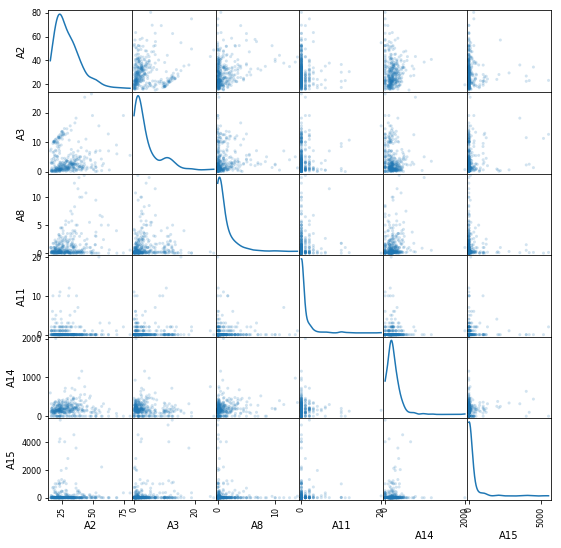

In [11]:
scatter_matrix(denied_df, alpha = 0.2, figsize=(9,9), diagonal='kde');


In [13]:
# For the T-tests of continuous variables, I have chosen A15 as the
# notably different variable and A14 as one that looks less different
# when split by the classification feature of + or -

# I am using the 2 sample T-test as I am comparing two datasets 
# which both appear approximately normal 

print ('2 sample T-test for A15 between the Approved and Denied DFs:')
A15_ttest = st.ttest_ind(approved_df['A15'], denied_df['A15'])
print ('The t-statistic for A15 between the distributions is:', A15_ttest[0])
print ('The p-value for A15 between the distributions is:', A15_ttest[1])
print ('\n')
degrees_freedom = (df['A15'].count()-1)
tdist = st.t(degrees_freedom)
# Based on this very low p-value, it is safe to say these two distributions have
# dissimilar means

A14_ttest = st.ttest_ind(approved_df.dropna()['A14'], denied_df.dropna()['A14'])
print ('2 sample T-test for A14 between the Approved and Denied DFs:')
print ('The t-statistic for A15 between the distributions is:', A14_ttest[0])
print ('The p-value for A15 between the distributions is:', A14_ttest[1])

# As you can see, there is definitely still a statistically significant difference
# as the p value is still < 0.05, but it still has about half the statistical 
# significance that A15 showed



2 sample T-test for A15 between the Approved and Denied DFs:
The t-statistic for A15 between the distributions is: 4.680216020964486
The p-value for A15 between the distributions is: 3.4520256956287944e-06


2 sample T-test for A14 between the Approved and Denied DFs:
The t-statistic for A15 between the distributions is: -2.18221936438708
The p-value for A15 between the distributions is: 0.029450100409286473


In [139]:
# Crosstab of categorical variables
categorical_df = df.select_dtypes(include=object)
categorical_df.head()

# Here I am crosstabbing each categorical value to the classifier column
crosstab_A1 = pd.crosstab(index=categorical_df['A1'], columns= categorical_df['A16'])
crosstab_A4 = pd.crosstab(index=categorical_df['A4'], columns= categorical_df['A16'])
crosstab_A5 = pd.crosstab(index=categorical_df['A5'], columns= categorical_df['A16'])
crosstab_A6 = pd.crosstab(index=categorical_df['A6'], columns= categorical_df['A16'])
crosstab_A7 = pd.crosstab(index=categorical_df['A7'], columns= categorical_df['A16'])
crosstab_A9 = pd.crosstab(index=categorical_df['A9'], columns= categorical_df['A16'])
crosstab_A10 = pd.crosstab(index=categorical_df['A10'], columns= categorical_df['A16'])
crosstab_A12 = pd.crosstab(index=categorical_df['A12'], columns= categorical_df['A16'])
crosstab_A13 = pd.crosstab(index=categorical_df['A13'], columns= categorical_df['A16'])

ct_list = [crosstab_A1, crosstab_A4, crosstab_A5, crosstab_A6, crosstab_A7, crosstab_A9,
          crosstab_A10, crosstab_A12, crosstab_A13]

# Here I am defining a function that prints the relevant information from the Chi Square test
def chi2_printer (crosstab):
    chi2 = st.chi2_contingency(crosstab)
    print ('The chi squared test statistic is:', chi2[0])
    print ('The chi squared p-value is:', chi2[1])
    print ('The marginal sums of the table are:',)
    print (chi2[3])
    print ('\n')
    return '' 

# Here I am creating lists of the information from each of the Chi Square tests
def chi2_ranker (list):
    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]
    ct_names = []
    t_stats = []
    p_vals = []
    for crosstab in list:
        chi2 = st.chi2_contingency(crosstab)
        ct_names.append(namestr(crosstab, globals()))
        t_stats.append(chi2[0])
        p_vals.append(chi2[1])
    return ct_names, t_stats, p_vals

test = (chi2_ranker(ct_list))

#Here I am printing each individual result
print ('The Chi Squared of + or - and A1')
print (chi2_printer(crosstab_A1))
print ('The Chi Squared of + or - and A4')
print (chi2_printer(crosstab_A4))
print ('The Chi Squared of + or - and A5')
print (chi2_printer(crosstab_A5))
print ('The Chi Squared of + or - and A6')
print (chi2_printer(crosstab_A6))
print ('The Chi Squared of + or - and A7')
print (chi2_printer(crosstab_A7))
print ('The Chi Squared of + or - and A9')
print (chi2_printer(crosstab_A9))
print ('The Chi Squared of + or - and A10')
print (chi2_printer(crosstab_A10))
print ('The Chi Squared of + or - and A12')
print (chi2_printer(crosstab_A12))
print ('The Chi Squared of + or - and A13')
print (chi2_printer(crosstab_A13))


name_col = [item for sublist in test[0] for item in sublist]

# Here I am creating a dataframe that ranks each crosstab by its predictive value
l1 = name_col
l2 = test[1][0:8]
l3 = test[2][0:8]
chi2df = pd.DataFrame(list(zip(l1, l2, l3)))
chi2df.columns = ['Crosstab', 'T-stat', 'P-value']
chi2df.sort_values(by='P-value')

# As you can see from the dataframe, the lowest p value can be observed on the chi squre 
# of the crosstab of A9 and the classifier variable while the highest p-value can be 
# observed in the crosstab of A1 and the classifier

The Chi Squared of + or - and A1
The chi squared test statistic is: 0.31128326491619945
The chi squared p-value is: 0.5768937883001117
The marginal sums of the table are:
[[ 94.15929204 115.84070796]
 [209.84070796 258.15929204]]



The Chi Squared of + or - and A4
The chi squared test statistic is: 26.234074966202144
The chi squared p-value is: 2.010680204180363e-06
The marginal sums of the table are:
[[  0.88596491   1.11403509]
 [229.90789474 289.09210526]
 [ 72.20614035  90.79385965]]



The Chi Squared of + or - and A5
The chi squared test statistic is: 26.234074966202144
The chi squared p-value is: 2.010680204180363e-06
The marginal sums of the table are:
[[229.90789474 289.09210526]
 [  0.88596491   1.11403509]
 [ 72.20614035  90.79385965]]



The Chi Squared of + or - and A6
The chi squared test statistic is: 98.32520342679135
The chi squared p-value is: 3.4999300402715717e-15
The marginal sums of the table are:
[[24.02643172 29.97356828]
 [60.95594714 76.04405286]
 [18.2422907

,Crosstab,T-stat,P-value
5,crosstab_A9,355.203817,3.118590e-79
6,crosstab_A10,143.069562,5.675727e-33
3,crosstab_A6,98.325203,3.499930e-15
4,crosstab_A7,45.034207,3.625453e-07
1,crosstab_A4,26.234075,2.010680e-06
2,crosstab_A5,26.234075,2.010680e-06
7,crosstab_A12,0.568273,4.509459e-01
0,crosstab_A1,0.311283,5.768938e-01


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

In [ ]:
# 2 sample T-test for A15 between the Approved and Denied DFs:
# The t-statistic for A15 between the distributions is: 4.680216020964486
# The p-value for A15 between the distributions is: 3.4520256956287944e-06
# So with such a low p-value when comparing the means of the two distributions,
# it shows that because the difference in means could not be random chance. 




# 2 sample T-test for A14 between the Approved and Denied DFs:
# The t-statistic for A14 between the distributions is: -2.18221936438708
# The p-value for A15 between the distributions is: 0.029450100409286473
# The p-value is still smaller than 0.05 and therefore still significant 
# in this case, but much less so than the A15 test. Because these are 
# features used in the decision to extend credit or not, it makes sense
# that most would be statistically significant. 


# As you can see from the dataframe, the lowest p value can be observed on the chi squre 
# of the crosstab of A9 and the classifier variable while the highest p-value can be 
# observed in the crosstab of A1 and the classifier. 

# Basically the A9 quality is highly related to credit-worthiness while A1 is just barely
# statistically insignificant as it exceeds 0.05. 


# The hardest part about this assignment was realizing I could not crosstab absolutely every categorical
# feature at one time. But I learned. 

